Import all the required libraries

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
from datetime import datetime
from time import *
from sklearn import metrics
# from pandas.stats.api import ols

Read data into dataframe with dateparser

In [10]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
df = pd.read_csv('day.csv', parse_dates=['dteday'], date_parser=dateparse)


In [11]:
print(df)

     instant     dteday  season  yr  mnth  holiday  weekday  workingday  \
0          1 2011-01-01       1   0     1        0        6           0   
1          2 2011-01-02       1   0     1        0        0           0   
2          3 2011-01-03       1   0     1        0        1           1   
3          4 2011-01-04       1   0     1        0        2           1   
4          5 2011-01-05       1   0     1        0        3           1   
5          6 2011-01-06       1   0     1        0        4           1   
6          7 2011-01-07       1   0     1        0        5           1   
7          8 2011-01-08       1   0     1        0        6           0   
8          9 2011-01-09       1   0     1        0        0           0   
9         10 2011-01-10       1   0     1        0        1           1   
10        11 2011-01-11       1   0     1        0        2           1   
11        12 2011-01-12       1   0     1        0        3           1   
12        13 2011-01-13  

Plotting cnt with respect to temperature

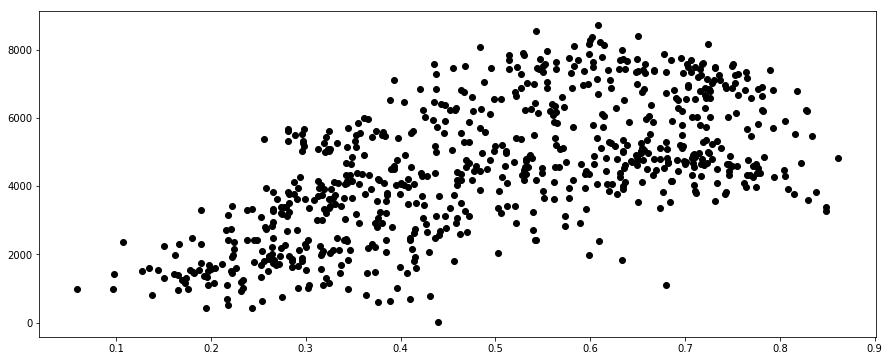

In [12]:
plt.plot(df['temp'], df['cnt'], 'o', color='black');



> cnt is increasing with temperature



Correlation between temp and cnt

In [13]:
df['temp'].corr(df['cnt'])

0.6274940090334918

Plotting cnt with respect to dteday

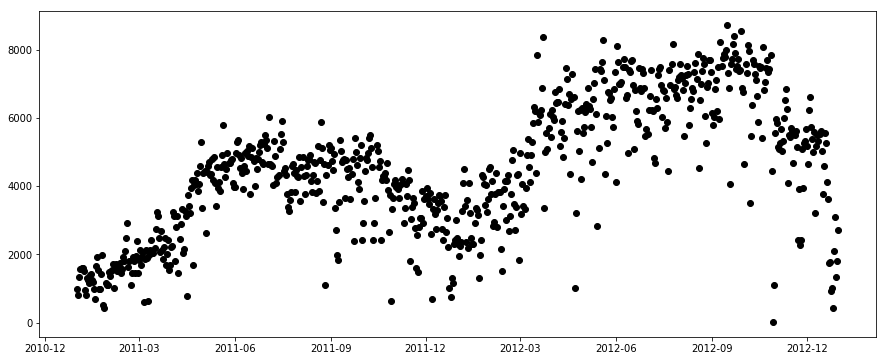

In [14]:
plt.plot(df['dteday'], df['cnt'], 'o', color='black')

Changing season to categorical

In [15]:
df['season_cat'] = pd.Categorical(df['season'])

Boxplot of cnt with respect to season

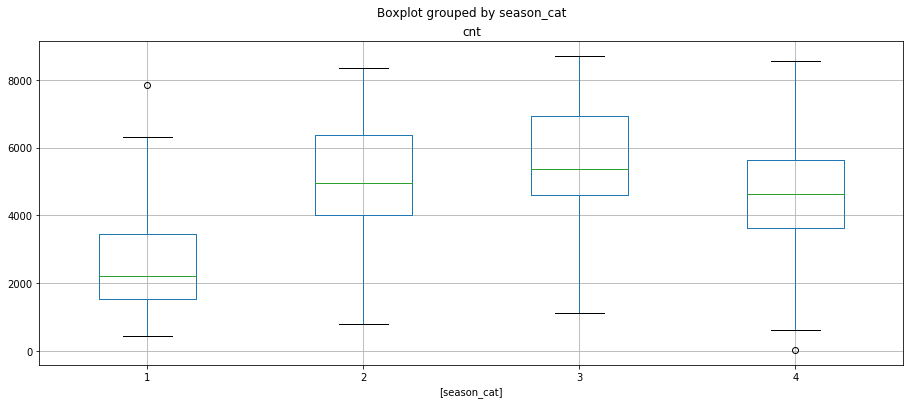

In [16]:
df[['season_cat', 'cnt']].boxplot(by = 'season_cat')


Changing season to categorical and plotting boxplot



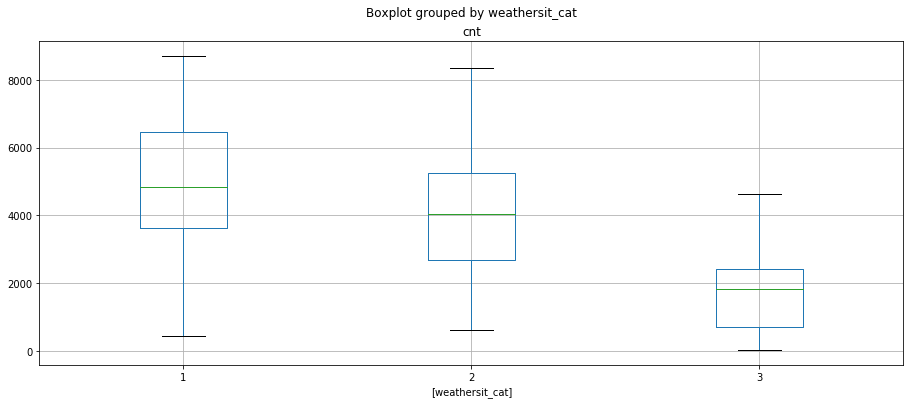

In [17]:
df['weathersit_cat'] = pd.Categorical(df['weathersit'])
df[['weathersit_cat', 'cnt']].boxplot(by = 'weathersit_cat')

Plottint cnt with respect to hum

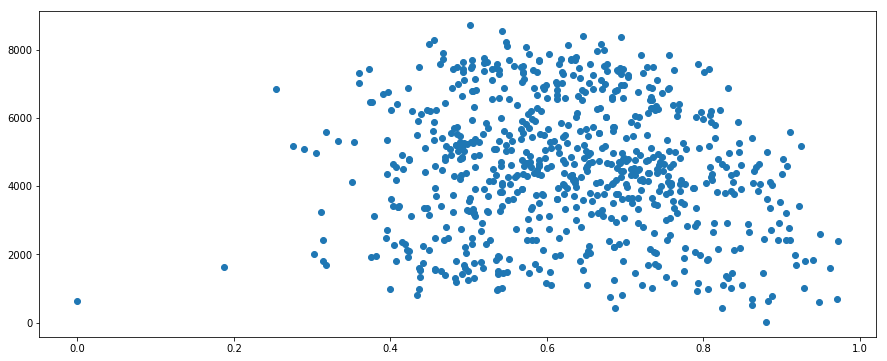

In [18]:
plt.plot(df['hum'], df['cnt'], 'o')



> It doesnt capture any meaningful relationship between humidity and target variable



Correlation between hum and cnt


In [19]:
df['hum'].corr(df['cnt'])

-0.10065856213715531

>There is also a worst correlation between humidity and cnt

In [20]:
df['windspeed'].describe()

count    731.000000
mean       0.190486
std        0.077498
min        0.022392
25%        0.134950
50%        0.180975
75%        0.233214
max        0.507463
Name: windspeed, dtype: float64

Correlation between windspeed and cnt


In [21]:
df['windspeed'].corr(df['cnt'])

-0.23454499742167

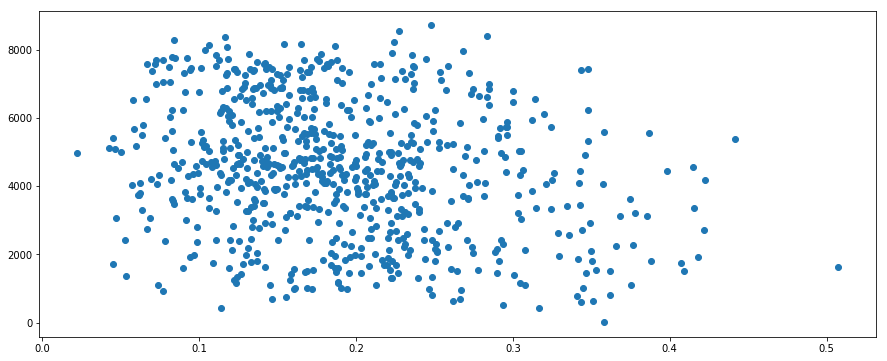

In [22]:
plt.plot(df['windspeed'], df['cnt'], 'o')

In [23]:
df['dteday'] = df['dteday'].map(datetime.toordinal)
print(df['dteday'])

0      734138
1      734139
2      734140
3      734141
4      734142
5      734143
6      734144
7      734145
8      734146
9      734147
10     734148
11     734149
12     734150
13     734151
14     734152
15     734153
16     734154
17     734155
18     734156
19     734157
20     734158
21     734159
22     734160
23     734161
24     734162
25     734163
26     734164
27     734165
28     734166
29     734167
        ...  
701    734839
702    734840
703    734841
704    734842
705    734843
706    734844
707    734845
708    734846
709    734847
710    734848
711    734849
712    734850
713    734851
714    734852
715    734853
716    734854
717    734855
718    734856
719    734857
720    734858
721    734859
722    734860
723    734861
724    734862
725    734863
726    734864
727    734865
728    734866
729    734867
730    734868
Name: dteday, Length: 731, dtype: int64


In [24]:
dates = df['dteday']
dates = (dates-dates.min())/(dates.max()-dates.min())
df['dteday'] = dates
print(df['dteday'])

0      0.000000
1      0.001370
2      0.002740
3      0.004110
4      0.005479
5      0.006849
6      0.008219
7      0.009589
8      0.010959
9      0.012329
10     0.013699
11     0.015068
12     0.016438
13     0.017808
14     0.019178
15     0.020548
16     0.021918
17     0.023288
18     0.024658
19     0.026027
20     0.027397
21     0.028767
22     0.030137
23     0.031507
24     0.032877
25     0.034247
26     0.035616
27     0.036986
28     0.038356
29     0.039726
         ...   
701    0.960274
702    0.961644
703    0.963014
704    0.964384
705    0.965753
706    0.967123
707    0.968493
708    0.969863
709    0.971233
710    0.972603
711    0.973973
712    0.975342
713    0.976712
714    0.978082
715    0.979452
716    0.980822
717    0.982192
718    0.983562
719    0.984932
720    0.986301
721    0.987671
722    0.989041
723    0.990411
724    0.991781
725    0.993151
726    0.994521
727    0.995890
728    0.997260
729    0.998630
730    1.000000
Name: dteday, Length: 73

In [25]:
print(df['yr'])

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
      ..
701    1
702    1
703    1
704    1
705    1
706    1
707    1
708    1
709    1
710    1
711    1
712    1
713    1
714    1
715    1
716    1
717    1
718    1
719    1
720    1
721    1
722    1
723    1
724    1
725    1
726    1
727    1
728    1
729    1
730    1
Name: yr, Length: 731, dtype: int64


In [26]:
dates = df['yr']
dates = (dates-dates.min())/(dates.max()-dates.min())
df['yr'] = dates
print(df['yr'])

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
5      0.0
6      0.0
7      0.0
8      0.0
9      0.0
10     0.0
11     0.0
12     0.0
13     0.0
14     0.0
15     0.0
16     0.0
17     0.0
18     0.0
19     0.0
20     0.0
21     0.0
22     0.0
23     0.0
24     0.0
25     0.0
26     0.0
27     0.0
28     0.0
29     0.0
      ... 
701    1.0
702    1.0
703    1.0
704    1.0
705    1.0
706    1.0
707    1.0
708    1.0
709    1.0
710    1.0
711    1.0
712    1.0
713    1.0
714    1.0
715    1.0
716    1.0
717    1.0
718    1.0
719    1.0
720    1.0
721    1.0
722    1.0
723    1.0
724    1.0
725    1.0
726    1.0
727    1.0
728    1.0
729    1.0
730    1.0
Name: yr, Length: 731, dtype: float64


Correlation between dteday and cnt


In [27]:
df['dteday'].corr(df['cnt'])

0.6288302722083061

Correlation between windspeed and temp


In [28]:
df['season'].corr(df['temp'])

0.3343148563990949

In [29]:
df.describe()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,0.500000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,0.289268,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,0.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,0.500000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,0.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,1.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Cost fuction

In [30]:
def cost_function(X, Y, B):
    m = len(Y)
    J = np.sum((X.dot(B) - Y) ** 2)
    J = J / (2 * m)
    return J

Function to find RMSE

In [31]:
def RMSE(X, Y, B):
    m = len(Y)
    J = np.sum((X.dot(B).astype(int) - Y) ** 2)    
    J = J**0.5
    J = J / (2 * m)
    return J

Function to find R-squared value

In [32]:
def R_sqrd(X, Y, B):
  Ybar = np.mean(Y)
  ssreg = np.sum((X.dot(B) - Ybar)**2)
  sstot = np.sum((Y - Ybar)**2)
  return ssreg/sstot

Function to do Linear Regression

In [33]:
def linear_regression(df, features, target):
  
  train_df = df[:int(len(df)*0.7)]
  test_df = df[int(len(df)*0.7):]
  m = len(train_df)
  x0 = np.ones(m)
  X = np.array([x0] + [train_df[x] for x in features]).T
  B = np.array([0] + [0 for x in features])
  Y = np.array(train_df[target])
  alpha = 0.0001
  inital_cost = cost_function(X, Y, B)
  print('Initial cost:', inital_cost)
  newB, cost_history = gradient_descent(X, Y, B, alpha, 100000)
  print(newB)
  print('RMSE on train:', RMSE(X, Y, newB))
  print('R squared value on train:', R_sqrd(X, Y, newB))
  print(test_df)
  m = len(test_df)
  x0 = np.ones(m)
  X_ = np.array([x0] + [test_df[x] for x in features]).T
  Y_ = np.array(test_df[target])
  print('RMSE on test:', RMSE(X_, Y_, newB))
  print('R squared value on train:', R_sqrd(X_, Y_, newB))
  return newB

Function to do gradient descent

In [34]:
def gradient_descent(X, Y, B, alpha, iterations):
    cost_history = [0] * iterations
    m = len(Y)
    
    for iteration in range(iterations):
        h = X.dot(B)
        loss = h - Y
        gradient = X.T.dot(loss) / m
        B = B - alpha * gradient
        cost = cost_function(X, Y, B)
        cost_history[iteration] = cost
        
    return B, cost_history

Doing linear regression with the features and finding RMSE and R-squared

In [35]:
features = ['dteday', 'holiday', 'weekday',
       'workingday', 'hum', 'windspeed']
features = ['season', 'yr', 'mnth', 'temp', 'weathersit']
linear_regression(df, features, 'cnt')
print('min count',min(df['cnt']))
print('max count',max(df['cnt']))

Initial cost: 8453737.078277886
[1445.91356325  759.03302101 2061.06937797   -7.92474148 1655.87187535
 -478.89947287]
RMSE on train: 22.029837680382563
R squared value on train: 0.45231669359976956
     instant    dteday  season   yr  mnth  holiday  weekday  workingday  \
511      512  0.700000       2  1.0     5        0        6           0   
512      513  0.701370       2  1.0     5        0        0           0   
513      514  0.702740       2  1.0     5        1        1           0   
514      515  0.704110       2  1.0     5        0        2           1   
515      516  0.705479       2  1.0     5        0        3           1   
516      517  0.706849       2  1.0     5        0        4           1   
517      518  0.708219       2  1.0     6        0        5           1   
518      519  0.709589       2  1.0     6        0        6           0   
519      520  0.710959       2  1.0     6        0        0           0   
520      521  0.712329       2  1.0     6        0 